<a href="https://colab.research.google.com/github/ejay34/YaP_Master_OCR/blob/main/pipeline_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Путь к исполняемому файлу Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [ ]:
def preprocess_image(image):
    '''Функция предварительной обработки изображения'''
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresholded

def detect_text_regions(image):
    '''Функция обнаружения областей текста с помощью обнаружения контуров'''
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    text_regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        aspect_ratio = float(w) / h
        if area > 1000 and aspect_ratio > 0.5 and aspect_ratio < 5:
            text_regions.append((x, y, w, h))
    return text_regions

def correct_image_distortion(image, text_regions):
    '''Функция для выполнения коррекции искажений изображения с помощью Docuware'''
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    document_contour = max(contours, key=cv2.contourArea)
    peri = cv2.arcLength(document_contour, True)
    approx = cv2.approxPolyDP(document_contour, 0.02 * peri, True)
    rect = cv2.minAreaRect(approx)
    box = cv2.boxPoints(rect)
    box = box.astype("float32")
    (tl, tr, br, bl) = box
    width = max(int(cv2.norm(tl, tr)), int(cv2.norm(bl, br)))
    height = max(int(cv2.norm(tl, bl)), int(cv2.norm(tr, br)))
    dst = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(box, dst)
    corrected_image = cv2.warpPerspective(image, M, (width, height))
    return corrected_image

def recognize_text(image):
    '''Функция для дальнейшего распознавания текста с помощью Tesseract OCR'''
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    extracted_text = pytesseract.image_to_string(gray)
    return extracted_text

In [ ]:
# Загрузка исходного изображение
image = cv2.imread('C:/Users/narut/Desktop/Portfolio/OCR/dataset/img/141899.jpg')

In [ ]:
# Предварительная обработка изображения
preprocessed_image = preprocess_image(image)

In [ ]:
# Обнаружение текстовых областей
text_regions = detect_text_regions(preprocessed_image)

In [ ]:
# Исправление искажений изображения
corrected_image = correct_image_distortion(image, text_regions)

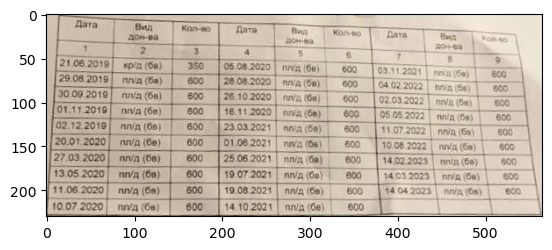

In [ ]:
plt.imshow(corrected_image)

In [ ]:
# Распознавание текста
extracted_text = recognize_text(corrected_image)

In [ ]:
# Вывод извлеченного текста
print(extracted_text)

Ba
FE (ie
Se
Tv ar] 08
Tun Ge) | 600
fava 6a) | 600 | 02002007 | win ay | oo
rv (Ge) | 600 105.05 2022 | nin Ge) | 800
rwa(6o)| 660 | #40752 | vam | B00 —
rave (6a) | 600} 1008-2002 | nwa ay | 800
na) | e00 [vaca z000 + win) | 000
iva (Ge) | 600 eo
19.08.2021 | nnin (6e) 600 CJ
444026271 ania oy | 000


